<a href="https://colab.research.google.com/github/LazyHooks/models_aon/blob/main/tier_1_ites_bp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [35]:

from numpy import loadtxt
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [36]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


load data

In [37]:
dataset = pd.read_csv('tier 1 it.csv')

In [38]:
print(dataset)

                                            Junior  Junior.1  Mid  \
0                                  Wipro ITES 2020         1    0   
1                          Capgemini BPO ITES 2021         1    0   
2                          Cognizant BPO ITES 2021         1    0   
3                            Infosys BPO ITES 2021         1    0   
4                     Wipro ASXX INXX Hi Tech 2020         1    0   
..                                             ...       ...  ...   
220         Infosys PRXX I1 I2 Hi Tech & ITES 2021         0    0   
221  Infosys PRXX M3 M4 & CSFC Hi Tech & ITES 2021         0    0   
222            TCS ASXX Others Hi Tech & ITES 2021         0    0   
223           TCS ASXXI1 I5 I6 Hi Tech & ITES 2021         0    0   
224              TCS ASXXI2 I4 Hi Tech & ITES 2021         0    0   

     Pay Positioning Score  Pay Range Score  Internal Parity  Balanced  \
0                        1                2                1         0   
1                      

split

In [39]:
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, -1].values

split

In [40]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

fit

In [41]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

print the model

In [42]:
print(model.feature_importances_)

[0.07506781 0.07133086 0.02150727 0.05308516 0.30138144 0.05400932
 0.16728604 0.09156023 0.16477185]


feature importance

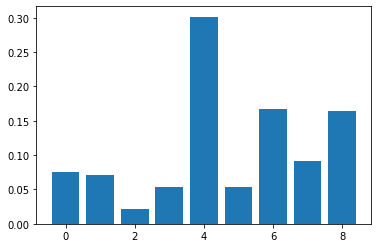

In [43]:
from matplotlib import pyplot
from xgboost import plot_importance
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()
#0-Junior
#1-mid
#2-Pay Positioning Score
#3-Pay Range Score	
#4-Internal focus
#5-Balanced	
#6-External	
#7-Pay Mix Score	
#8-Pay Differentiation Score	


predict

In [44]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

evaluate predictions

In [45]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.00%


Weights

In [46]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X)



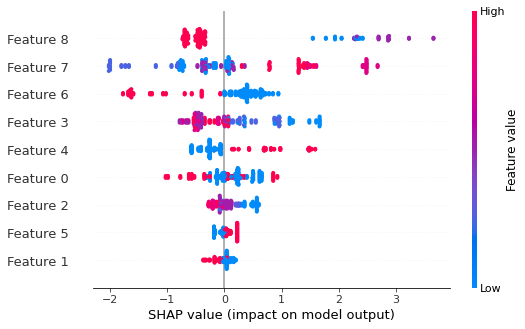

In [47]:
shap.plots.beeswarm(shap_values)

visualise single

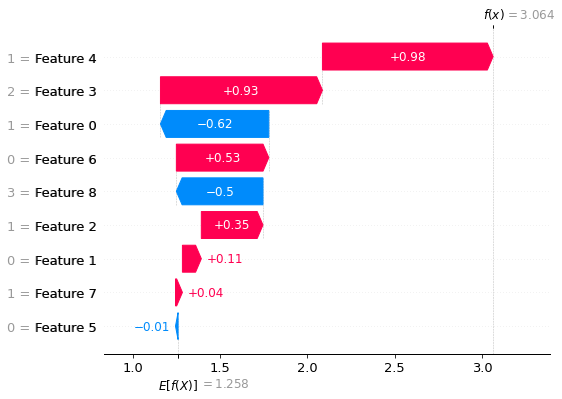

In [48]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

predict 1

In [49]:
#singlepred = model.predict([[]])
#singleprediction = [round(value) for value in y_pred]
#print(singleprediction)